In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
# get class names
class_path = './Traffic_signs/labels.csv'
classes = pd.read_csv(class_path)
class_names = list(classes['Name'])
print(class_names)

['Speed limit (5km/h)', 'Speed limit (15km/h)', 'Speed limit (30km/h)', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'speed limit (80km/h)', 'Dont Go straight or left', 'Dont Go straight or Right', 'Dont Go straight', 'Dont Go Left', 'Dont Go Left or Right', 'Dont Go Right', 'Dont overtake from Left', 'No Uturn', 'No Car', 'No horn', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Go straight or right', 'Go straight', 'Go Left', 'Go Left or right', 'Go Right', 'keep Left', 'keep Right', 'Roundabout mandatory', 'watch out for cars', 'Horn', 'Bicycles crossing', 'Uturn', 'Road Divider', 'Traffic signals', 'Danger Ahead', 'Zebra Crossing', 'Bicycles crossing', 'Children crossing', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Unknown1', 'Unknown2', 'Unknown3', 'Go right or straight', 'Go left or straight', 'Unknown4', 'ZigZag Curve', 'Train Crossing', 'Under Construction', 'Unknown5', 'Fences', 'Heavy Vehicle Accidents'

In [6]:
data_dir = './Traffic_signs/traffic_Data/DATA'
num_images = pd.DataFrame(class_names, columns=['label'])

In [7]:
count = []
for dir in os.listdir(data_dir):
    count.append(len(os.listdir(data_dir + '/' + dir)))
num_images['count'] = count
num_images.head()

,label,count
0,Speed limit (5km/h),56
1,Speed limit (15km/h),6
2,Speed limit (30km/h),14
3,Speed limit (40km/h),156
4,Speed limit (50km/h),110


In [8]:
num_images.label.value_counts()

label
Bicycles crossing               2
Speed limit (40km/h)            2
Speed limit (50km/h)            2
Go left or straight             1
Road Divider                    1
Traffic signals                 1
Danger Ahead                    1
Zebra Crossing                  1
Children crossing               1
Dangerous curve to the left     1
Dangerous curve to the right    1
Unknown1                        1
Unknown2                        1
Unknown3                        1
Go right or straight            1
Speed limit (5km/h)             1
Unknown4                        1
Uturn                           1
Train Crossing                  1
Under Construction              1
Unknown5                        1
Fences                          1
Heavy Vehicle Accidents         1
Unknown6                        1
Give Way                        1
No stopping                     1
No entry                        1
Unknown7                        1
ZigZag Curve                    1
Horn    

<Figure size 640x480 with 0 Axes>

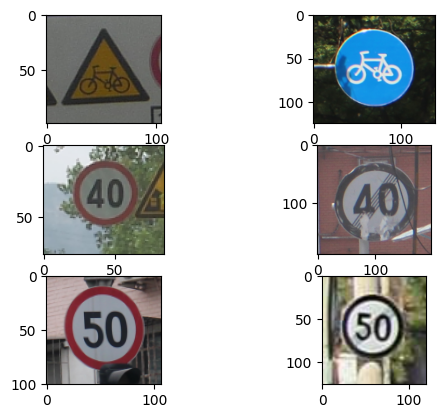

In [10]:
plt.figure()
fig, axs = plt.subplots(3, 2)
img = mpimg.imread('./Traffic_signs/traffic_Data/DATA/36/036_0001.png')
axs[0,0].imshow(img)
img = mpimg.imread('./Traffic_signs/traffic_Data/DATA/30/030_0001.png')
axs[0,1].imshow(img)
img = mpimg.imread('./Traffic_signs/traffic_Data/DATA/3/003_0001.png')
axs[1,0].imshow(img)
img = mpimg.imread('./Traffic_signs/traffic_Data/DATA/18/018_0001.png')
axs[1,1].imshow(img)
img = mpimg.imread('./Traffic_signs/traffic_Data/DATA/4/004_0001.png')
axs[2,0].imshow(img)
img = mpimg.imread('./Traffic_signs/traffic_Data/DATA/19/019_0001.png')
axs[2,1].imshow(img)

plt.show()


In [11]:
num_images.sort_values('count')[:10]

,label,count
57,Unknown8,2
34,Danger Ahead,2
11,Dont Go Left,2
24,Go Right,4
7,speed limit (80km/h),4
1,Speed limit (15km/h),6
5,Speed limit (60km/h),8
9,Dont Go straight or Right,8
26,keep Right,8
42,Unknown3,10


In [12]:
datagen = ImageDataGenerator(rescale = 1.0/255, validation_split=0.5)

In [13]:
BATCH_SIZE = 32
train_gen = datagen.flow_from_directory(data_dir, class_mode='categorical', subset='training', batch_size=BATCH_SIZE)
test_gen = datagen.flow_from_directory(data_dir, class_mode='categorical', subset='validation', batch_size=BATCH_SIZE, shuffle=False)

Found 2085 images belonging to 58 classes.
Found 2085 images belonging to 58 classes.


In [14]:
train_images = train_gen.samples
test_images = test_gen.samples

print(train_images)

2085


In [15]:
# check iterators are working
batchX, batchY = train_gen.next()
print('train batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
batchX, batchY = test_gen.next()
print('test batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
input_shape = batchX.shape[1:]

train batch shape=(32, 256, 256, 3), min=0.000, max=1.000
test batch shape=(32, 256, 256, 3), min=0.000, max=1.000


In [16]:
import pandas as pd
from tensorflow.keras.applications import VGG16


In [17]:
vgg16_obj = VGG16(include_top = False, input_shape = (256,256,3))    #  include_top = False is used to skip the layer from flattern
for layer in vgg16_obj.layers:             # Off the training of the trainable parameters
    layer.trainable = False
vgg16_obj.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [18]:
vgg16_obj.output

<KerasTensor: shape=(None, 8, 8, 512) dtype=float32 (created by layer 'block5_pool')>

In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten
f1 = Flatten()(vgg16_obj.output)
final_layer = Dense(58, activation='softmax')(f1)
final_layer

<KerasTensor: shape=(None, 58) dtype=float32 (created by layer 'dense')>

In [21]:
model_vgg = Model(inputs=vgg16_obj.input,outputs=final_layer)
model_vgg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [22]:
model_vgg.compile('adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model_vgg.fit(train_gen, validation_data= test_gen,epochs=3)

Epoch 1/3
66/66 [==============================] - 796s 12s/step - loss: 1.4597 - accuracy: 0.7472 - val_loss: 0.2383 - val_accuracy: 0.9333
Epoch 2/3
66/66 [==============================] - 992s 15s/step - loss: 0.1073 - accuracy: 0.9770 - val_loss: 0.0329 - val_accuracy: 0.9909
Epoch 3/3
66/66 [==============================] - 924s 14s/step - loss: 0.0233 - accuracy: 0.9938 - val_loss: 0.0221 - val_accuracy: 0.9933


In [25]:
model_vgg.save('Trafffic_sign_prediction-vgg16.keras')

In [26]:
from tensorflow.keras.models import load_model

loaded_model_vgg = load_model("Trafffic_sign_prediction-vgg16.h5")

In [27]:
test_gen.reset()
raw_predictions_vgg = loaded_model_vgg.predict(test_gen)

66/66 [==============================] - 303s 5s/step


In [28]:
predictions_vgg = []
for item in raw_predictions_vgg:
    predictions_vgg.append(np.argmax(item))

In [29]:
print(classification_report(test_gen.labels, predictions_vgg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00        71
           9       1.00      1.00      1.00        65
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        40
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         9
          16       1.00      1.00      1.00         7
          17       1.00    

In [30]:
cm_vgg = confusion_matrix(test_gen.labels, predictions_vgg)

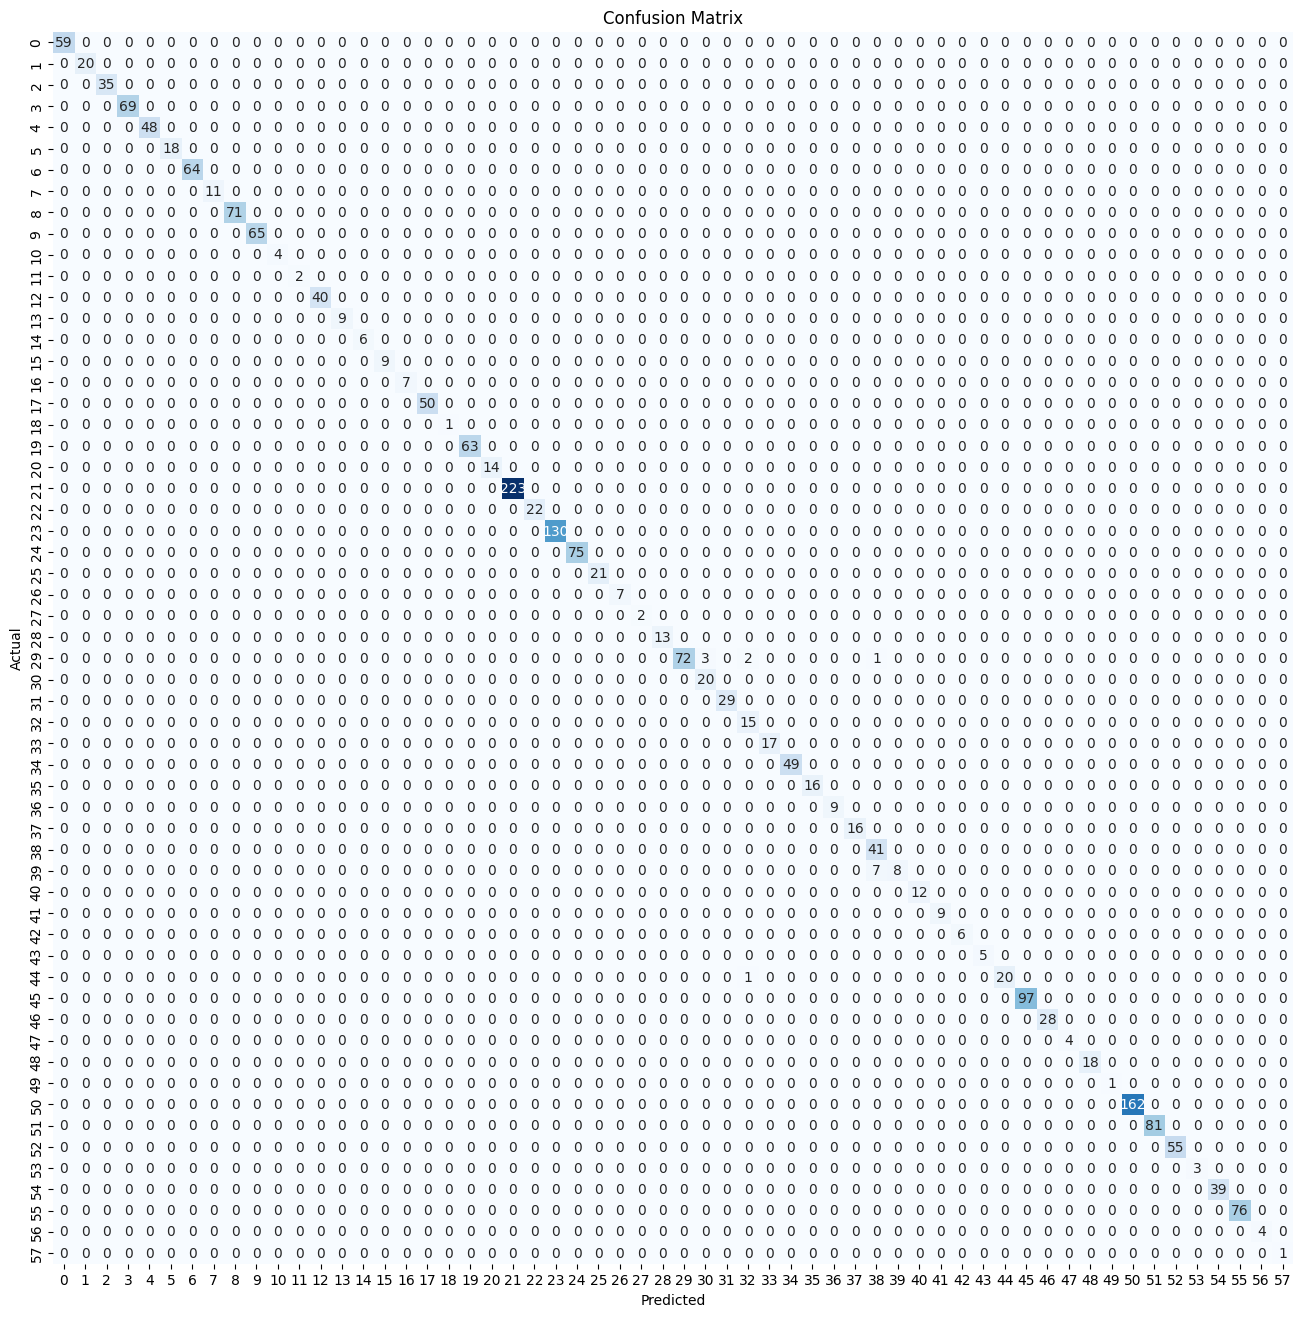

In [31]:
plt.figure(figsize=(16, 16))
sns.heatmap(cm_vgg, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [32]:
cr_vgg=classification_report(test_gen.labels, predictions_vgg)

# ***Xception***


In [33]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
pretrained_base=Xception(include_top=False, input_shape = input_shape, pooling='avg', weights="imagenet")
pretrained_base.trainable=False
model_Xception = Sequential(
    [
    pretrained_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(len(class_names), activation='softmax')
    ]
)

83683744/83683744 [==============================] - 3s 0us/step


In [35]:
print(model_Xception.summary())
model_Xception.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 58)                14906     
                                                                 
Total params: 21400930 (81.64 MB)
Trainable params: 539450 (2.06 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________
None


In [36]:
callback= EarlyStopping(
  monitor="val_loss",
  min_delta=0.001,
  patience=5,
  restore_best_weights=True)

In [38]:
hist = model_Xception.fit_generator(generator=train_gen, validation_data= test_gen, epochs=3)

Epoch 1/3


/var/folders/8v/bzsq1_6j4qz1m9gqdzvgfjrc0000gn/T/ipykernel_3970/1359605203.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_Xception.fit_generator(generator=train_gen, validation_data= test_gen, epochs=3)


66/66 [==============================] - 201s 3s/step - loss: 2.0597 - accuracy: 0.5132 - val_loss: 0.9083 - val_accuracy: 0.7923
Epoch 2/3
66/66 [==============================] - 218s 3s/step - loss: 0.7587 - accuracy: 0.8120 - val_loss: 0.4269 - val_accuracy: 0.9213
Epoch 3/3
66/66 [==============================] - 222s 3s/step - loss: 0.4120 - accuracy: 0.9108 - val_loss: 0.2631 - val_accuracy: 0.9549


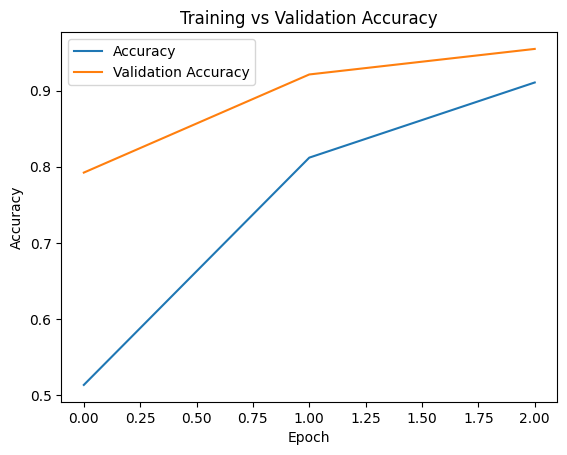

In [39]:
# plot results
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend(["Accuracy","Validation Accuracy"])

In [40]:
model.save('Trafffic_sign_prediction-xception.h5')

/Users/lakshmikeerthanaaravapalli/.pyenv/versions/3.9.2/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
test_gen.reset()
raw_predictions_Xception = model_Xception.predict(test_gen)

66/66 [==============================] - 100s 2s/step


In [42]:
predictions_Xception = []
for item in raw_predictions_Xception:
    predictions_Xception.append(np.argmax(item))

In [43]:
print(classification_report(test_gen.labels, predictions_Xception))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      0.85      0.92        20
           2       1.00      1.00      1.00        35
           3       0.99      0.96      0.97        69
           4       1.00      1.00      1.00        48
           5       1.00      0.89      0.94        18
           6       1.00      0.95      0.98        64
           7       1.00      1.00      1.00        11
           8       1.00      0.99      0.99        71
           9       0.96      1.00      0.98        65
          10       1.00      1.00      1.00         4
          11       1.00      0.50      0.67         2
          12       0.86      0.95      0.90        40
          13       1.00      0.89      0.94         9
          14       1.00      1.00      1.00         6
          15       1.00      0.78      0.88         9
          16       1.00      0.86      0.92         7
          17       1.00    

/Users/lakshmikeerthanaaravapalli/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lakshmikeerthanaaravapalli/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lakshmikeerthanaaravapalli/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [44]:
cm_Xception = confusion_matrix(test_gen.labels, predictions_Xception)

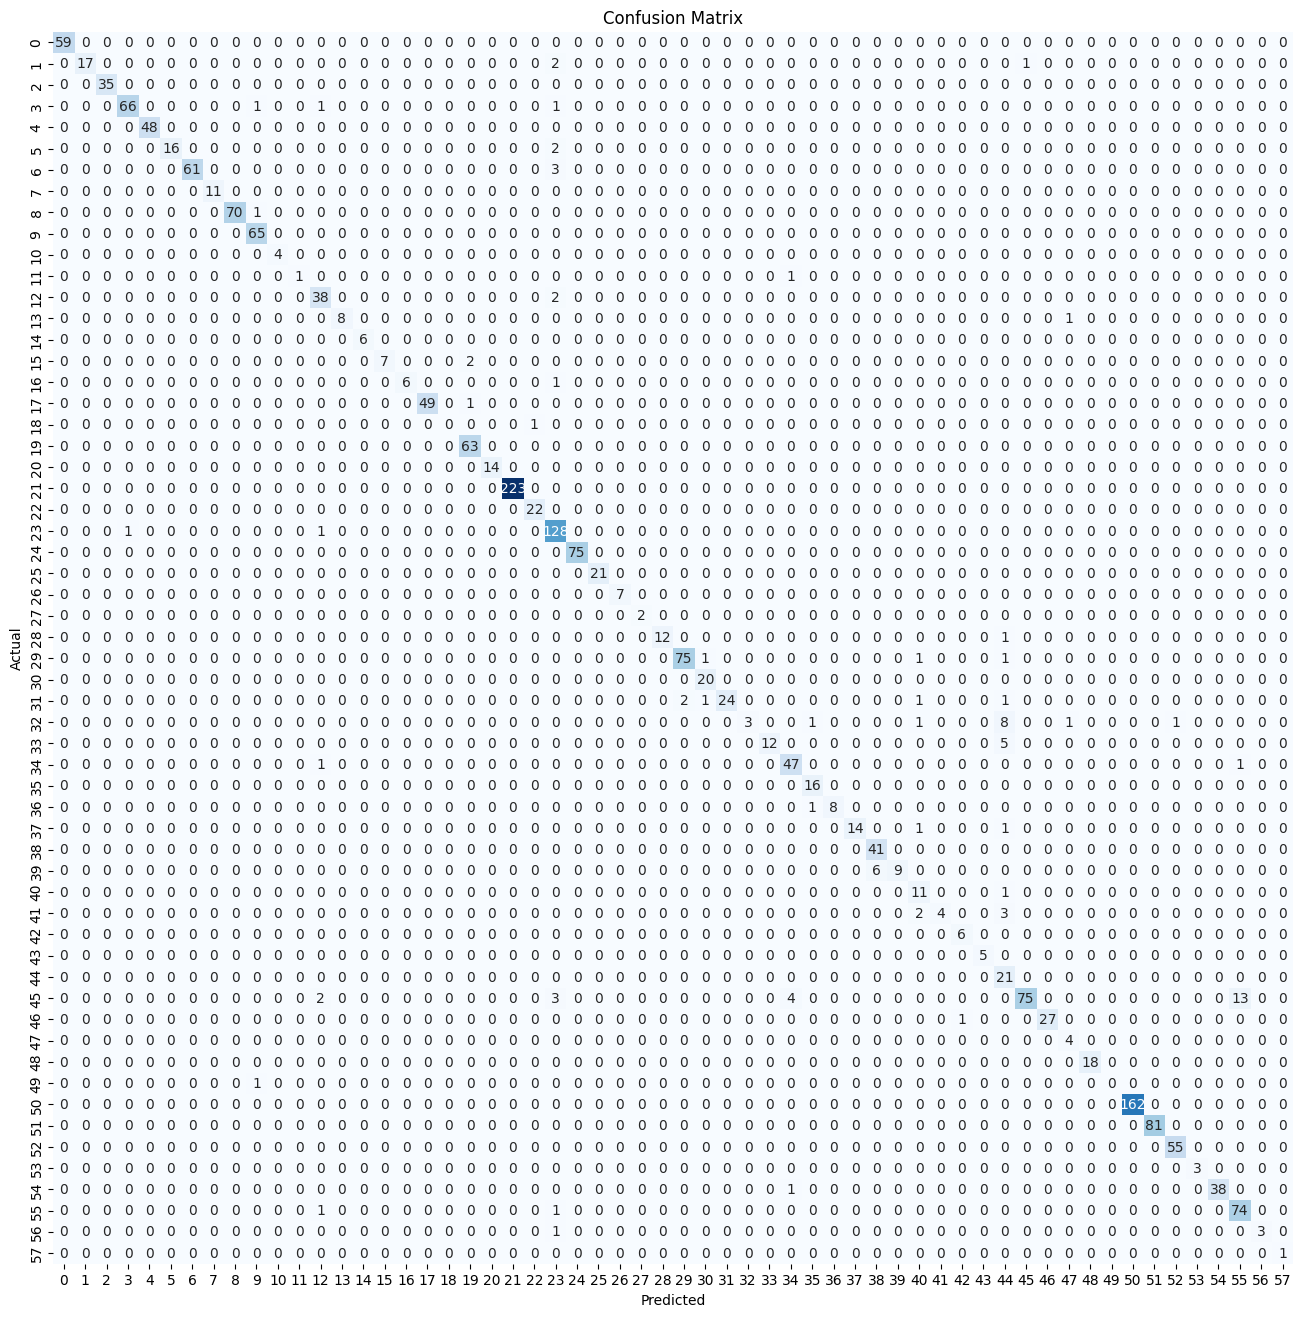

In [45]:
plt.figure(figsize=(16, 16))
sns.heatmap(cm_Xception, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [46]:
cr_Xception=classification_report(test_gen.labels, predictions_Xception)

/Users/lakshmikeerthanaaravapalli/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lakshmikeerthanaaravapalli/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lakshmikeerthanaaravapalli/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

# ResNet50

In [47]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=input_shape, include_top=False, weights="imagenet")
for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [49]:
rom tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.models import Model


model_ResNet50 = Sequential(
    [
    base_model,
    Flatten(),
    Dense(len(class_names), activation='softmax')
    ]
)

model_ResNet50.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_3 (Dense)             (None, 58)                7602234   
                                                                 
Total params: 31189946 (118.98 MB)
Trainable params: 7602234 (29.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [50]:
from tensorflow.keras.optimizers import Adam

model_ResNet50.compile(optimizer=Adam(),loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=3)
model_ResNet50.fit(train_gen, validation_data= test_gen,epochs=20,callbacks=[callback])

Epoch 1/20
66/66 [==============================] - 186s 3s/step - loss: 33.9029 - accuracy: 0.1189 - val_loss: 16.7325 - val_accuracy: 0.2374
Epoch 2/20
66/66 [==============================] - 210s 3s/step - loss: 8.8967 - accuracy: 0.3832 - val_loss: 5.9564 - val_accuracy: 0.4638
Epoch 3/20
66/66 [==============================] - 218s 3s/step - loss: 5.0990 - accuracy: 0.5065 - val_loss: 3.7715 - val_accuracy: 0.5458
Epoch 4/20
66/66 [==============================] - 210s 3s/step - loss: 3.3454 - accuracy: 0.5731 - val_loss: 3.9110 - val_accuracy: 0.5549
Epoch 5/20
66/66 [==============================] - 208s 3s/step - loss: 3.1724 - accuracy: 0.6197 - val_loss: 3.2711 - val_accuracy: 0.6398
Epoch 6/20
66/66 [==============================] - 218s 3s/step - loss: 3.6729 - accuracy: 0.6225 - val_loss: 3.5136 - val_accuracy: 0.6772
Epoch 7/20
66/66 [==============================] - 252s 4s/step - loss: 4.5862 - accuracy: 0.5794 - val_loss: 3.2963 - val_accuracy: 0.6700
Epoch 8/20


In [52]:
model_ResNet50.save('Trafffic_sign_prediction-resnet50.h5')

/Users/lakshmikeerthanaaravapalli/.pyenv/versions/3.9.2/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
test_gen.reset()
raw_predictions_ResNet50 = model_ResNet50.predict(test_gen)

66/66 [==============================] - 85s 1s/step


In [54]:
predictions_ResNet50 = []
for item in raw_predictions_ResNet50:
    predictions_ResNet50.append(np.argmax(item))

In [55]:
print(classification_report(test_gen.labels, predictions_ResNet50))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.91      1.00      0.95        20
           2       0.81      1.00      0.90        35
           3       1.00      0.88      0.94        69
           4       1.00      0.75      0.86        48
           5       0.00      0.00      0.00        18
           6       1.00      0.44      0.61        64
           7       1.00      0.82      0.90        11
           8       1.00      0.75      0.85        71
           9       0.91      0.98      0.95        65
          10       0.06      1.00      0.12         4
          11       0.40      1.00      0.57         2
          12       1.00      0.38      0.55        40
          13       1.00      0.56      0.71         9
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         9
          16       1.00      0.57      0.73         7
          17       0.96    

/Users/lakshmikeerthanaaravapalli/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lakshmikeerthanaaravapalli/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lakshmikeerthanaaravapalli/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [56]:
cm_ResNet50 = confusion_matrix(test_gen.labels, predictions_ResNet50)

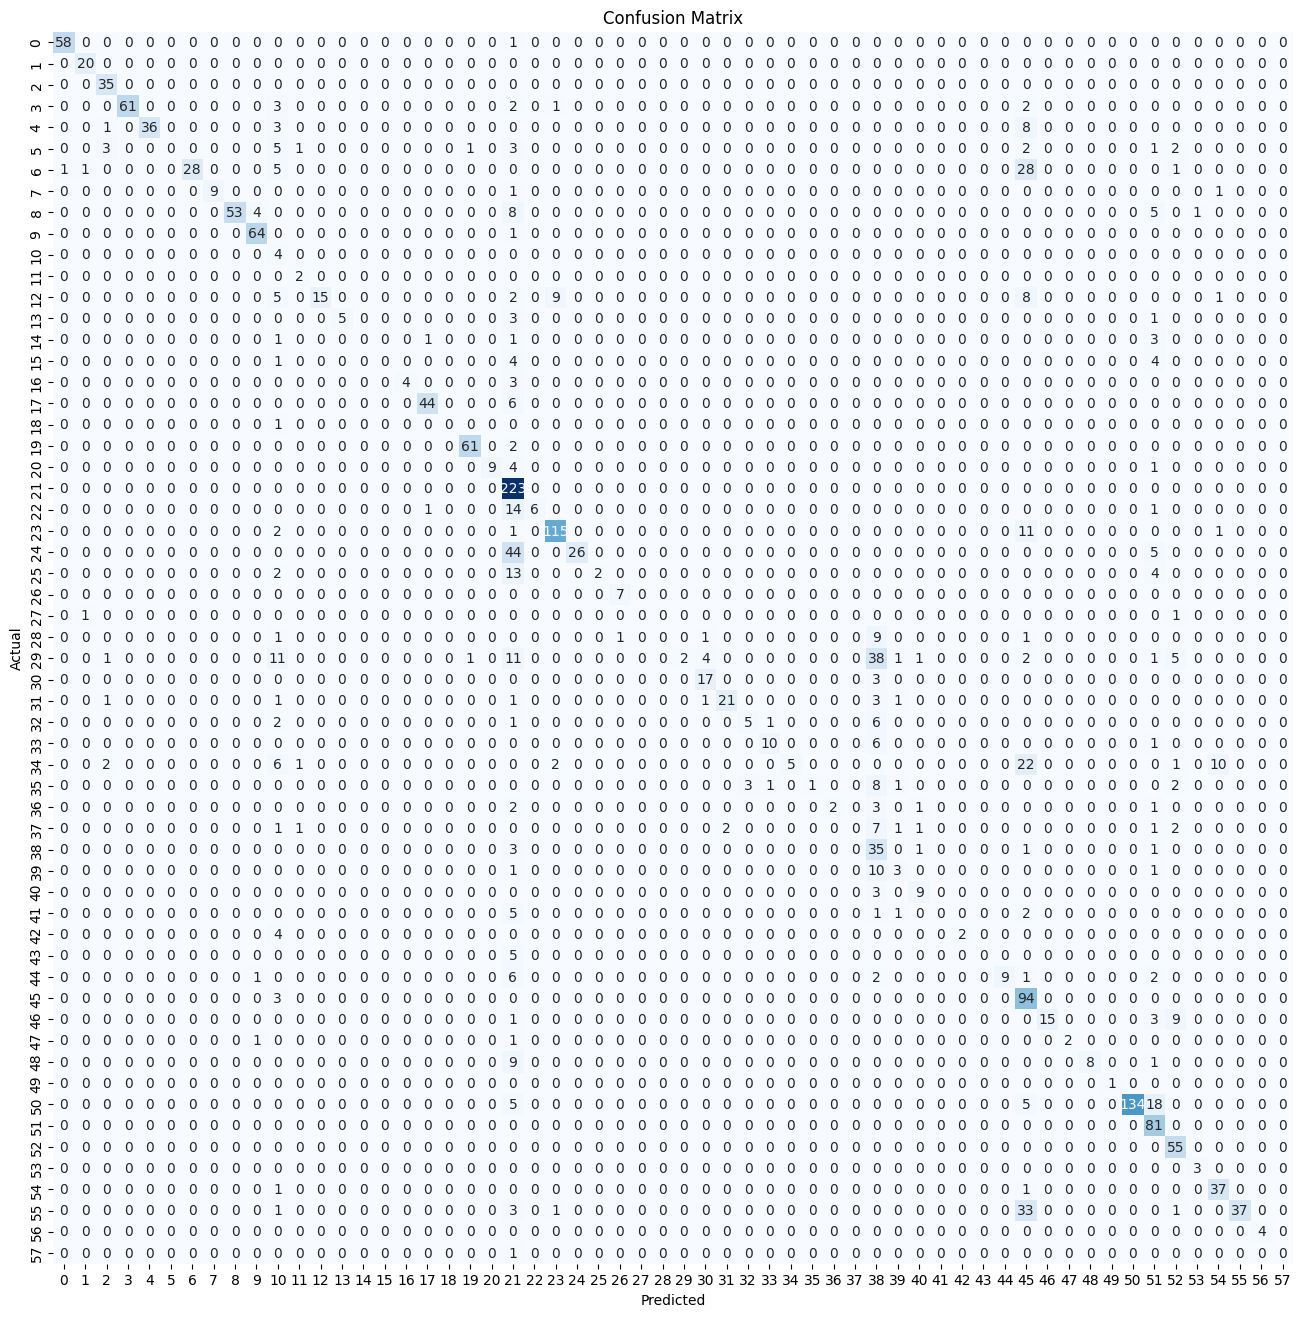

In [57]:
plt.figure(figsize=(16, 16))
sns.heatmap(cm_ResNet50, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()